In [1]:
import functools
import jax
import os
import html

from datetime import datetime
from jax import numpy as jp
jax.config.update("jax_debug_nans", False)
jax.config.update("jax_enable_x64", True)
import matplotlib.pyplot as plt

from IPython.display import HTML, clear_output, display

import flax
from brax import envs
from brax.io import model
from brax.io import json
from brax.io import html

import shutil

from src.pods.Pods import train as train_pods
from src.hds.Hds import train as train_hds
from src.env.Pendulum import InvertedPendulum
import pickle




In [2]:
from jax.lib import xla_bridge
print(xla_bridge.get_backend().platform)
print(jax.devices())

cpu
[CpuDevice(id=0)]


In [3]:
env = InvertedPendulum(target=jp.array([1]))
state = jax.jit(env.reset)(rng=jax.random.PRNGKey(seed=0))

#HTML(html.render(env.sys, [state.pipeline_state]))

In [4]:
ckpt_dir = './tmp/flax_ckpt'

if os.path.exists(ckpt_dir):
    shutil.rmtree(ckpt_dir)  # Remove any existing checkpoints from the last notebook run.

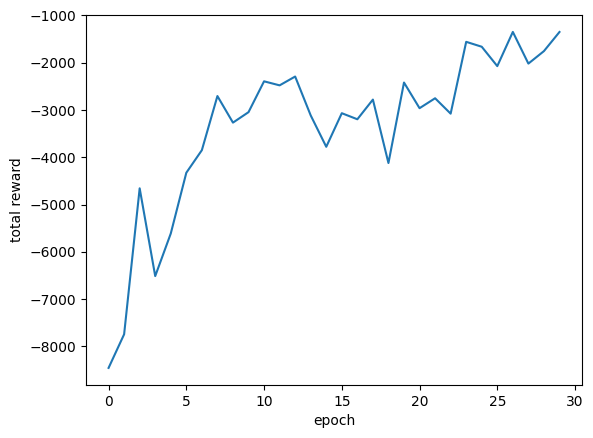

big epoch: 29 small epoch: 0 Loss 1.078188403430842e-05
big epoch: 29 small epoch: 1 Loss 0.0001362782370675273
big epoch: 29 small epoch: 2 Loss 0.0002288037710733244
big epoch: 29 small epoch: 3 Loss 0.00022206360221461982
big epoch: 29 small epoch: 4 Loss 0.00030211552718486563
big epoch: 29 small epoch: 5 Loss 8.417425701299811e-05
big epoch: 29 small epoch: 6 Loss 9.911945539290711e-05
big epoch: 29 small epoch: 7 Loss 3.207458592322146e-05
big epoch: 29 small epoch: 8 Loss 1.5998947118012624e-05
big epoch: 29 small epoch: 9 Loss 2.569098430163305e-05
big epoch: 29 small epoch: 10 Loss 1.1592077958995784e-05
big epoch: 29 small epoch: 11 Loss 1.0946807036500217e-05
big epoch: 29 small epoch: 12 Loss 1.3373890717379659e-05
big epoch: 29 small epoch: 13 Loss 3.206107915940853e-05
big epoch: 29 small epoch: 14 Loss 7.457249051721714e-05
big epoch: 29 small epoch: 15 Loss 5.947234872984834e-05
big epoch: 29 small epoch: 16 Loss 2.50549674147997e-05
big epoch: 29 small epoch: 17 Loss 2

In [5]:

def progress_f(x_data,y_data,epoch,reward):
    print(reward)
    x_data.append(epoch)
    y_data.append(reward)
    clear_output(wait=True)
    plt.xlabel('epoch')
    plt.ylabel('total reward')
    plt.plot(x_data, y_data)
    plt.show()

#policy = train_hds(env,trajectory_length=100 ,num_samples=50,epochs=4, inner_epochs=20, alpha_a=1e-5, init_learning_rate=1e-3, init_noise=0.1, noise_decay=0.5, progress_fn=progress_f) 
policy = train_pods(env,trajectory_length=100 ,num_samples=100,epochs=30, inner_epochs=20, alpha_a=8e-5, init_learning_rate=1e-3, progress_fn=progress_f)

In [6]:
f = open("reward.txt", "w")
g = open("actions.txt", "w")
inference_fn = policy()
rollout = []
rng = jax.random.PRNGKey(seed=1)
state = env.reset(rng=rng)
reward = []
actions = []
for _ in range(1000):
  rollout.append(state.pipeline_state)
  act_rng, rng = jax.random.split(rng)
  #print(state.obs)
  act = inference_fn(state.obs)
  print(act)
  reward.append(state.reward)
  state = env.step(state, act)
  #print(state.reward)
  actions.append(act)

  
print(reward, file=f)
print(actions, file=g)

[0.99614181]
[0.99219403]
[0.98426211]
[0.96828183]
[0.88595263]
[0.60439189]
[0.48517868]
[0.35652481]
[0.3374572]
[0.3374572]
[0.3374572]
[0.3374572]
[0.3374572]
[0.3374572]
[0.3374572]
[0.33393468]
[0.33130918]
[0.32786567]
[0.32559757]
[0.30706541]
[0.28939142]
[0.2655266]
[0.24093432]
[0.23510063]
[0.24452755]
[0.25156247]
[0.25344548]
[0.25329385]
[0.25094026]
[0.24634858]
[0.23959099]
[0.23265363]
[0.23551197]
[0.23310405]
[0.22945848]
[0.2272703]
[0.22716114]
[0.22573107]
[0.22354093]
[0.21904832]
[0.21344652]
[0.20749423]
[0.2012755]
[0.19418928]
[0.18719441]
[0.18015748]
[0.17288987]
[0.16073505]
[0.14808506]
[0.13292247]
[0.11805914]
[0.1021078]
[0.08565698]
[0.07297889]
[0.06259556]
[0.05393926]
[0.04760989]
[0.04331587]
[0.0400045]
[0.03526765]
[0.03141888]
[0.02815342]
[0.02526617]
[0.02286191]
[0.02010301]
[0.016075]
[0.01016535]
[0.00374807]
[-0.00319316]
[-0.0106354]
[-0.01830456]
[-0.02477839]
[-0.03063379]
[-0.03673355]
[-0.04264838]
[-0.04692913]
[-0.0510362]
[-0.05

In [7]:

yes=html.render(env.sys.replace(dt=env.dt), rollout)
with open("data.html", "w") as file:
    file.write(yes)